# ANCOM: 16S

Comparisons to be made at weeks 2 and 5, separately:
- placebo (p) v letrozole (let)
- let co-housed (let-ch) v let

Took OTU table in BIOM format and converted to tsv with taxonomy using the following shell command:<br>
<code>biom convert -i table.biom -o otu_w_taxonomy.txt --to-tsv --header-key taxonomy</code><br>
Then deleted first line of the output file which read "# Constructed from biom file".

In [1]:
library(tidyverse)
library(magrittr)
source("/Users/Cayla/ANCOM/scripts/ancom_v2.1.R")

── Attaching packages ───────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


Welcome to compositions, a package for compositional data analysis.
Find an intro with "? compositions"



Attaching package: ‘compositions’


The following objects are masked from ‘package:stats’:

    cor, cov, dist, var


The following objects are masked from ‘package:base’:

    %*%, norm, scale, scale.default




In [2]:
table <- read_tsv('otu_w_taxonomy.txt')
head(table,n=1)


── Column specification ──────────────────────────────────────────────────
cols(
  .default = col_double(),
  `#OTU ID` = col_character(),
  taxonomy = col_character()
)
ℹ Use `spec()` for the full column specifications.




#OTU ID,573.T3,598.T1,589.T2,593.T3,586.T2,590.T3,601.T1,572.T1,597.T3,⋯,593.T2,580.T3,572.T2,601.T3,591.T5,572.T3,593.T5,599.T3,570.T4,taxonomy
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
denovo227,20,7,0,19,12,9,16,0,3,⋯,1,2,1,1,0,0,0,0,0,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__; g__; s__


In [3]:
table %<>% rename(OTU.ID = `#OTU ID`)

# extract full taxonomic assignment and store in separate df for later
taxonomy <- data.frame(table$OTU.ID, table$taxonomy)
table$taxonomy <- NULL
head(taxonomy)

,table.OTU.ID,table.taxonomy
,<chr>,<chr>
1,denovo227,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__; g__; s__
2,denovo439,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__; s__
3,denovo585,k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__S24-7; g__; s__
4,denovo680,k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__S24-7; g__; s__
5,denovo710,k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__S24-7; g__; s__
6,denovo726,k__Bacteria; p__Tenericutes; c__Mollicutes; o__RF39; f__; g__; s__


In [4]:
taxonomy %<>% rename(OTU.ID = table.OTU.ID) # apparently you have to do this one at a time :(
taxonomy %<>% rename(taxonomy = table.taxonomy)
taxonomy %<>% separate(taxonomy, c('k','p','c','o','f','g','s'), sep = ";", remove = TRUE)
head(taxonomy)

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 92 rows [23, 48, 51, 68, 92, 102, 169, 184, 200, 213, 238, 272, 277, 366, 372, 426, 493, 512, 568, 584, ...].”


,OTU.ID,k,p,c,o,f,g,s
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,denovo227,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__
2,denovo439,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__,s__
3,denovo585,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__S24-7,g__,s__
4,denovo680,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__S24-7,g__,s__
5,denovo710,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__S24-7,g__,s__
6,denovo726,k__Bacteria,p__Tenericutes,c__Mollicutes,o__RF39,f__,g__,s__


In [5]:
taxonomy %<>% mutate(k = str_split_fixed(k,pattern = '__',n=2)[,2],
                     p = str_split_fixed(p,pattern = '__',n=2)[,2],
                     c = str_split_fixed(c,pattern = '__',n=2)[,2],
                     o = str_split_fixed(o,pattern = '__',n=2)[,2],
                     f = str_split_fixed(f,pattern = '__',n=2)[,2],
                     g = str_split_fixed(g,pattern = '__',n=2)[,2],
                     s = str_split_fixed(s,pattern = '__',n=2)[,2])

head(taxonomy)

,OTU.ID,k,p,c,o,f,g,s
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,denovo227,Bacteria,Firmicutes,Clostridia,Clostridiales,,,
2,denovo439,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,,
3,denovo585,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,,
4,denovo680,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,,
5,denovo710,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,,
6,denovo726,Bacteria,Tenericutes,Mollicutes,RF39,,,


In [6]:
# change all blank elements "" to NA
taxonomy[taxonomy == ""] <- NA

# check it
is.na(taxonomy[1,8])

[1] TRUE

In [7]:
taxa <- taxonomy %>%  
    pivot_longer(-OTU.ID, names_to='rank', values_to='assignment') %>% 
    filter(!is.na(assignment)) %>% 
    group_by(OTU.ID) %>% 
    summarize(Lowest.Rank = tail(assignment, 1))

head(taxa)

OTU.ID,Lowest.Rank
<chr>,<chr>
denovo100002,S24-7
denovo10003,S24-7
denovo100329,Streptococcus
denovo100359,S24-7
denovo100438,Ruminococcaceae
denovo100506,CF231


In [8]:
# load the metadata
metadata <- read_tsv('https://raw.githubusercontent.com/bryansho/PCOS_WGS_16S_metabolome/master/DESEQ2/16S/mapping_file_cohousing2018.tsv',)
head(metadata, n=1)


── Column specification ──────────────────────────────────────────────────
cols(
  .default = col_character(),
  Mouse = col_double(),
  Week = col_double(),
  Cecum = col_logical(),
  weight = col_double(),
  Lh = col_double(),
  Testosterone = col_double(),
  Weight_g = col_double(),
  observed_SVs1250 = col_double(),
  pielou_e1250 = col_double(),
  faith_pd1250 = col_double(),
  shannon1250 = col_double(),
  FBG = col_double(),
  individual = col_double()
)
ℹ Use `spec()` for the full column specifications.




#SampleID,BarcodeSequence,LinkerPrimerSequence,TSRI_Seq_plate,Well_Position,Sequenc_ Name,Sequence,PCR_Date,Mouse,Cage,⋯,Insulin,Testosterone,Weight_g,observed_SVs1250,pielou_e1250,faith_pd1250,shannon1250,FBG,individual,Description
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
570.T0,CACGTTTATTCC,CCGGACTACHVGGGTWTCTAAT,Plate1,A01,806rcbc214,CAC GTT TAT TCC CCG GAC TAC HVG GGT WTC TAA T,3_20_18,570,A,⋯,NA,NA,15.3,174,0.938056,8.544578,6.981898,NA,1,570.T0


In [9]:
metadata %<>% 
    select(`#SampleID`,Category, Week) %>% 
    mutate(across(everything(), as.factor))
    
head(metadata,n=1)

#SampleID,Category,Week
<fct>,<fct>,<fct>
570.T0,Placebo,0


In [10]:
# remove NAs if present
table[is.na(table)] <- 0

In [11]:
# subset data and metadata
meta.t2.PvL <- metadata %>% filter(Week == '2', 
                                   Category == 'Placebo' | Category == 'Letrozole')
t2.PvL <- table %>% 
    select(OTU.ID, any_of(meta.t2.PvL$`#SampleID`)) %>% 
    column_to_rownames('OTU.ID')



meta.t2.LvLCH <- metadata %>% filter(Week == '2', 
                                   Category == 'Co-L' | Category == 'Letrozole')
t2.LvLCH <- table %>% 
    select(OTU.ID, any_of(meta.t2.LvLCH$`#SampleID`)) %>% 
    column_to_rownames('OTU.ID')




meta.t5.PvL <- metadata %>% filter(Week == '5', 
                                   Category == 'Placebo' | Category == 'Letrozole')
t5.PvL <- table %>% 
    select(OTU.ID, any_of(meta.t5.PvL$`#SampleID`)) %>% 
    column_to_rownames('OTU.ID')



meta.t5.LvLCH <- metadata %>% filter(Week == '5', 
                                   Category == 'Co-L' | Category == 'Letrozole')
t5.LvLCH <- table %>% 
    select(OTU.ID, any_of(meta.t5.LvLCH$`#SampleID`)) %>% 
    column_to_rownames('OTU.ID')

## Time Point 2
### Placebo v Letrozole

In [12]:
# Data Preprocessing

# feature_table is a df/matrix with features as rownames and samples in columns
feature_table <- t2.PvL 

# character vector/column containing sample IDs
sample_var <- "#SampleID"

# grouping variable to detect structural zeros and outliers
group_var <- "Category"

# 0 < fraction < 1. For each feature, observations with proportion of mixture 
# distribution < out_cut will be detected as outlier zeros;
# > (1 - out_cut) will be detected as outlier values
out_cut <- 0.05

# 0 < fraction < 1. Features with proportion of zeros > zero_cut are removed.
zero_cut <- 0.90 

# samples with library size < lib_cut will be excluded in the analysis
lib_cut <- 0

# TRUE indicates a taxon would be classified as a structural zero in the 
# corresponding experimental group using its asymptotic lower bound. More 
# specifically, ```neg_lb = TRUE``` indicates you are using both criteria 
# stated in section 3.2 of [ANCOM-II]
# (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5682008/) to detect structural
# zeros; Otherwise, ```neg_lb = FALSE``` will only use the equation 1 in 
# section 3.2 of [ANCOM-II](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5682008/)
# for declaring structural zeros.
neg_lb <- TRUE

prepro <- feature_table_pre_process(feature_table, meta.t2.PvL, sample_var, group_var, 
                                   out_cut, zero_cut, lib_cut, neg_lb)

# Preprocessed feature table
feature_table1 <- prepro$feature_table

# Preprocessed metadata
meta_data1 <- prepro$meta_data 

# Structural zero info
struc_zero1 <- prepro$structure_zeros 

In [13]:
# Run ANCOM

# name of the main variable of interest (character)
main_var <- "Category"

p_adj_method <- "BH" # number of taxa > 10, therefore use Benjamini-Hochberg correction

alpha <- 0.05

# character string representing the formula for adjustment
adj_formula <- NULL 

# character string representing the formula for random effects in lme
rand_formula <- NULL

t_start <- Sys.time()

res <- ANCOM(feature_table1, meta_data1, struc_zero1, main_var, p_adj_method, 
            alpha, adj_formula, rand_formula)

t_end <- Sys.time()
t_end - t_start 

# write output to file
# output contains the "W" statistic for each taxa - a count of the number of times 
# the null hypothesis is rejected for each taxa
# detected_x are logicals indicating detection at specified FDR cut-off
write_csv(res$out, "2021-07-18_16S_T2_PvL_ANCOM_data.csv")

Time difference of 18.54354 mins

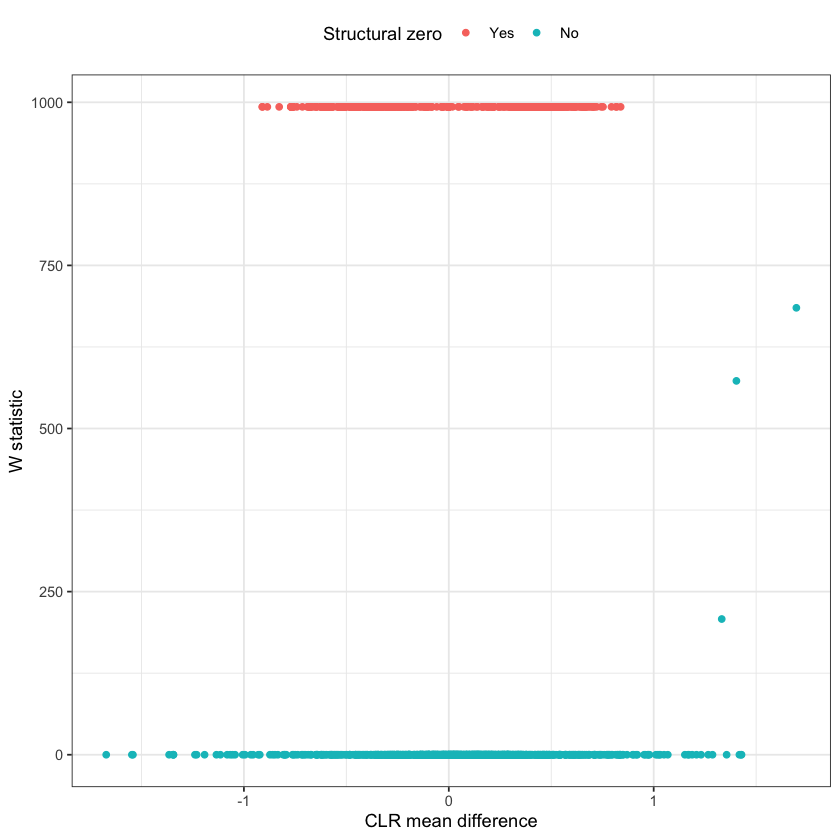

In [14]:
res$fig

In [15]:
n_taxa <- ifelse(is.null(struc_zero1), nrow(feature_table1), sum(apply(struc_zero1, 1, sum) == 0))
n_taxa

[1] 994

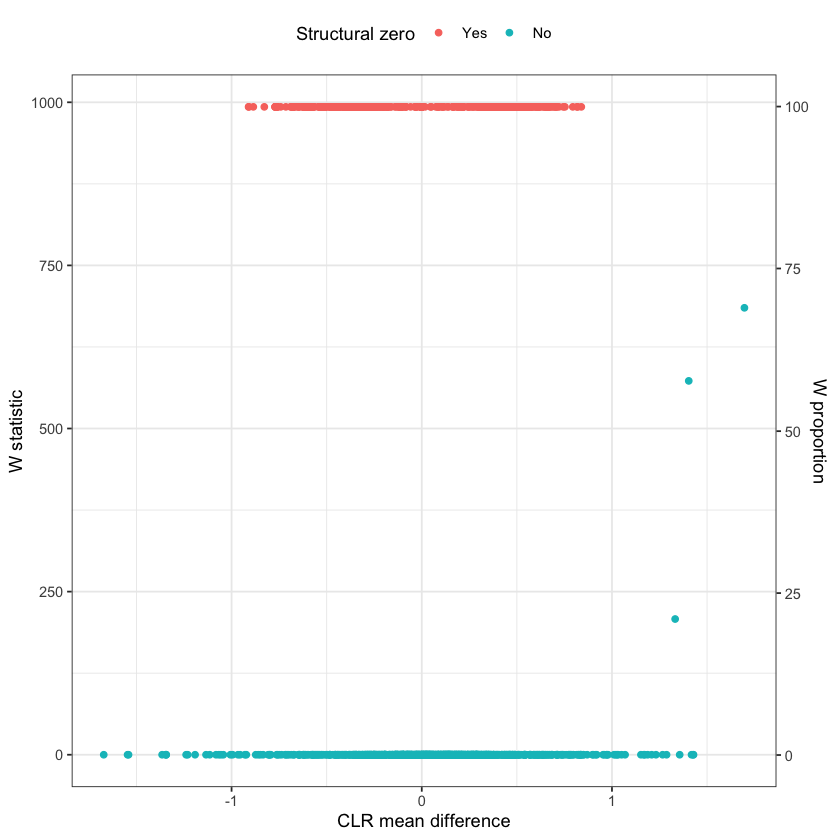

In [16]:
res$fig + scale_y_continuous(sec.axis = sec_axis(~ . * 100 / (n_taxa-1), name = 'W proportion'))

In [17]:
ggsave(filename = paste(lubridate::today(),'volcano_16S_T2_PvL.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

Saving 7 x 7 in image



In [18]:
head(res$fig$data)

,taxa_id,x,y,zero_ind
,<chr>,<dbl>,<dbl>,<fct>
denovo227,denovo227,-0.92986051,0,No
denovo439,denovo439,-0.02797993,0,No
denovo585,denovo585,0.00000000,993,Yes
denovo680,denovo680,-0.06103057,0,No
denovo726,denovo726,0.00000000,993,Yes
denovo810,denovo810,0.44124281,993,Yes


In [19]:
# save features with W > 0 
non.zero <- res$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(taxa, by = c('taxa_id' = 'OTU.ID')) %>% 
    mutate(W.proportion = y/(n_taxa-1)) %>% # add W    
    filter(W.proportion > 0) %>% 
    rowid_to_column()
    
write.csv(non.zero, paste(lubridate::today(),'NonZeroW_Features_16S_T2_PvL.csv',sep='_'))

In [20]:
# to find most significant taxa, I will sort the data 
# 1) y (W statistic)
# 2) according to the absolute value of CLR mean difference
sig <- res$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(taxa, by = c('taxa_id' = 'OTU.ID')) %>% 
    filter(y >= (0.7*n_taxa), !is.na(Lowest.Rank)) # keep significant taxa, remove unidentified taxa

write.csv(sig, paste(lubridate::today(),'SigFeatures_16S_T2_PvL.csv',sep='_'))

In [21]:
sig %<>% slice_head(n=20) 
sig

taxa_id,x,y,zero_ind,Lowest.Rank
<chr>,<dbl>,<dbl>,<fct>,<chr>
denovo153781,-0.9106041,993,Yes,CF231
denovo134984,-0.9093106,993,Yes,Lachnospiraceae
denovo175813,-0.8857003,993,Yes,flavefaciens
denovo347575,0.8387629,993,Yes,Lachnospiraceae
denovo240820,-0.8278606,993,Yes,CF231
denovo352071,0.8197415,993,Yes,Lactobacillus
denovo595831,0.8158236,993,Yes,schaedleri
denovo597599,0.7939302,993,Yes,S24-7
denovo211331,-0.7713505,993,Yes,Clostridiales


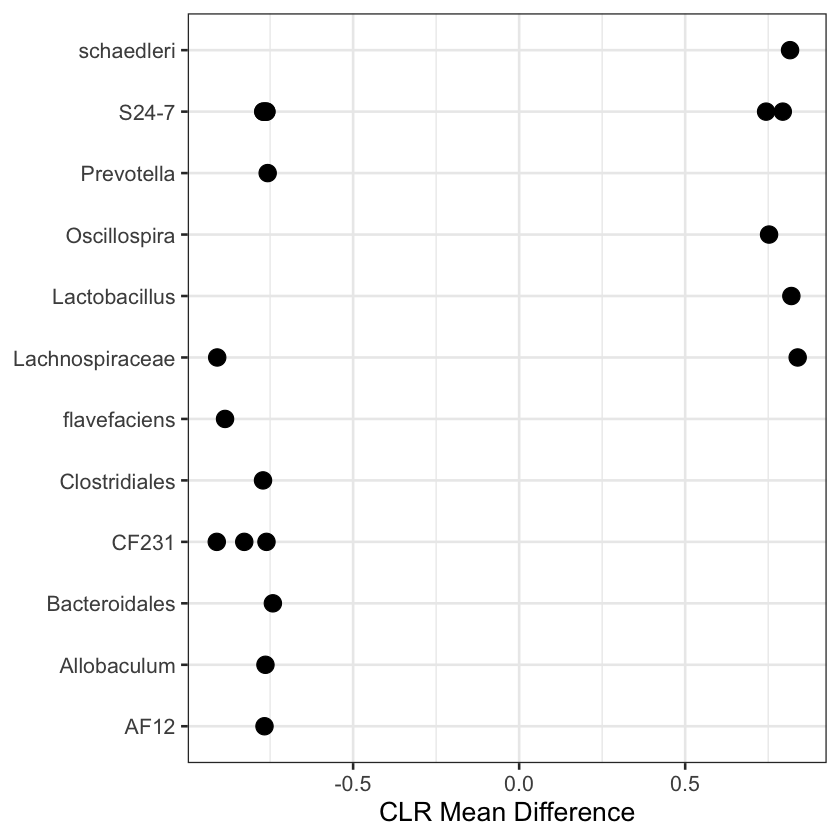

In [22]:
# plot top 20 taxa
sig %>% 
    ggplot(aes(x, Lowest.Rank)) +
    geom_point(aes(size = 1)) +
    theme_bw(base_size = 16) + 
    guides(size = FALSE) +
    labs(x = 'CLR Mean Difference', y = NULL)

In [23]:
ggsave(filename = paste(lubridate::today(),'Top20_16S_T2_PvL.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

Saving 7 x 7 in image



### Letrozole v Let-CH

In [24]:
# Data Preprocessing

feature_table <- t2.LvLCH 
sample_var <- "#SampleID"
group_var <- "Category"
out_cut <- 0.05
zero_cut <- 0.90 
lib_cut <- 0
neg_lb <- TRUE

prepro <- feature_table_pre_process(feature_table, meta.t2.LvLCH, sample_var, group_var, 
                                   out_cut, zero_cut, lib_cut, neg_lb)

# Preprocessed feature table
feature_table2 <- prepro$feature_table

# Preprocessed metadata
meta_data2 <- prepro$meta_data 

# Structural zero info
struc_zero2 <- prepro$structure_zeros 

In [25]:
# Run ANCOM

# name of the main variable of interest (character)
main_var <- "Category"

p_adj_method <- "BH" # number of taxa > 10, therefore use Benjamini-Hochberg correction

alpha <- 0.05

# character string representing the formula for adjustment
adj_formula <- NULL 

# character string representing the formula for random effects in lme
rand_formula <- NULL

t_start <- Sys.time()

res2 <- ANCOM(feature_table2, meta_data2, struc_zero2, main_var, p_adj_method, 
            alpha, adj_formula, rand_formula)

t_end <- Sys.time()
t_end - t_start 

# write output to file
# output contains the "W" statistic for each taxa - a count of the number of times 
# the null hypothesis is rejected for each taxa
# detected_x are logicals indicating detection at specified FDR cut-off
write_csv(res2$out, "2021-07-18_16S_T2_LvLCH_ANCOM_data.csv")

Time difference of 22.10874 mins

Saving 7 x 7 in image



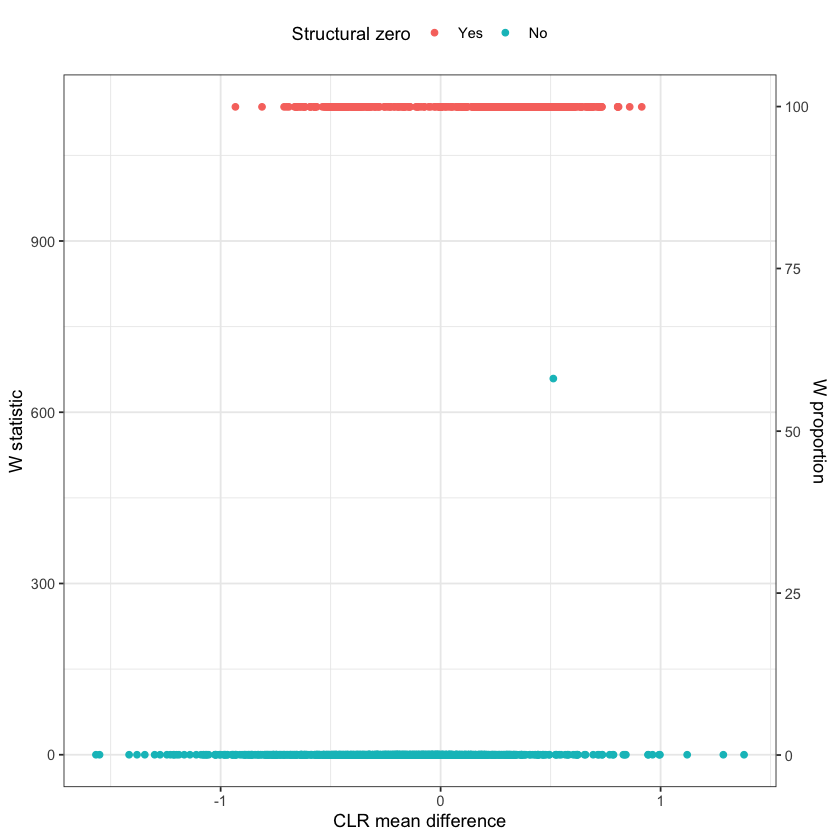

In [26]:
n_taxa <- ifelse(is.null(struc_zero2), nrow(feature_table2), sum(apply(struc_zero2, 1, sum) == 0))
res2$fig + scale_y_continuous(sec.axis = sec_axis(~ . * 100 / (n_taxa-1), name = 'W proportion'))
ggsave(filename = paste(lubridate::today(),'volcano_16S_T2_LvLCH.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

In [27]:
# save features with W > 0 
non.zero <- res2$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(taxa, by = c('taxa_id' = 'OTU.ID')) %>% 
    mutate(W.proportion = y/(n_taxa-1)) %>% # add W    
    filter(W.proportion > 0) %>% 
    rowid_to_column()
    
write.csv(non.zero, paste(lubridate::today(),'NonZeroW_Features_16S_T2_LvLCH.csv',sep='_'))

In [28]:
# to find most significant taxa, I will sort the data 
# 1) y (W statistic)
# 2) according to the absolute value of CLR mean difference
sig <- res2$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(taxa, by = c('taxa_id' = 'OTU.ID')) %>% 
    filter(y >= (0.7*n_taxa), !is.na(Lowest.Rank)) # keep significant taxa, remove unidentified taxa

write.csv(sig, paste(lubridate::today(),'SigFeatures_16S_T2_LvLCH.csv',sep='_'))

Saving 7 x 7 in image



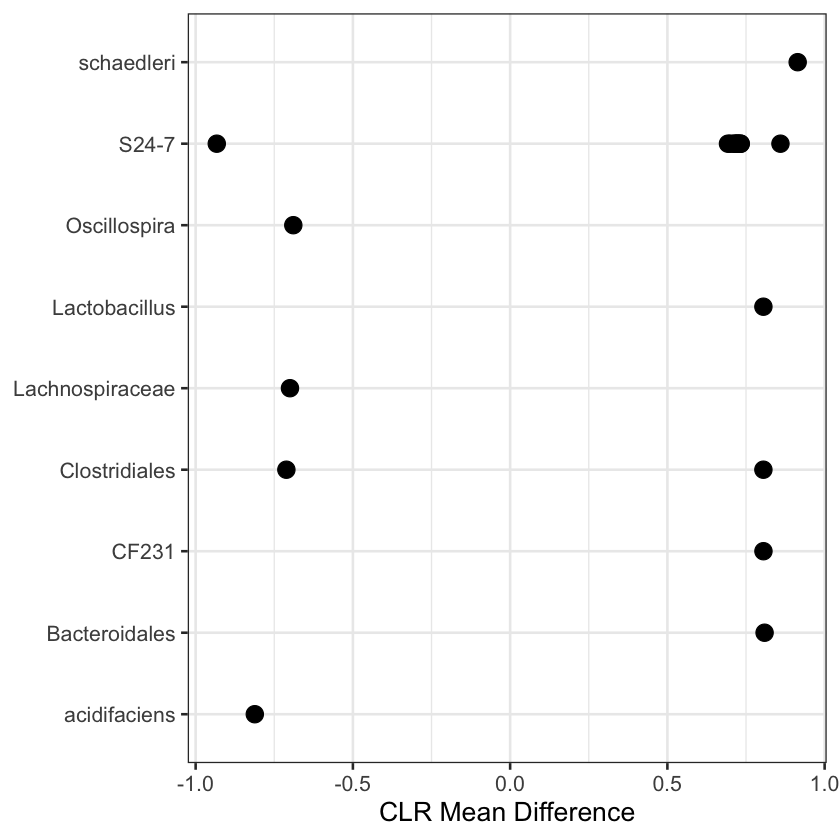

In [29]:
# plot top 20 taxa
sig %>% 
    slice_head(n=20) %>% 
    ggplot(aes(x, Lowest.Rank)) +
    geom_point(aes(size = 1)) +
    theme_bw(base_size = 16) + 
    guides(size = FALSE) +
    labs(x = 'CLR Mean Difference', y = NULL)

ggsave(filename = paste(lubridate::today(),'Top20_16S_T2_LvLCH.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

## Time Pt 5
### Placebo v Letrozole

In [30]:
# Data Preprocessing

feature_table <- t5.PvL 
sample_var <- "#SampleID"
group_var <- "Category"
out_cut <- 0.05
zero_cut <- 0.90 
lib_cut <- 0
neg_lb <- TRUE

prepro <- feature_table_pre_process(feature_table, meta.t5.PvL, sample_var, group_var, 
                                   out_cut, zero_cut, lib_cut, neg_lb)

# Preprocessed feature table
feature_table3 <- prepro$feature_table

# Preprocessed metadata
meta_data3 <- prepro$meta_data 

# Structural zero info
struc_zero3 <- prepro$structure_zeros 

In [31]:
# Run ANCOM

main_var <- "Category"
p_adj_method <- "BH" # number of taxa > 10, therefore use Benjamini-Hochberg correction
alpha <- 0.05
adj_formula <- NULL 
rand_formula <- NULL

t_start <- Sys.time()

res3 <- ANCOM(feature_table3, meta_data3, struc_zero3, main_var, p_adj_method, 
            alpha, adj_formula, rand_formula)

t_end <- Sys.time()
t_end - t_start 

# write output to file
# output contains the "W" statistic for each taxa - a count of the number of times 
# the null hypothesis is rejected for each taxa
# detected_x are logicals indicating detection at specified FDR cut-off
write_csv(res3$out, "2021-07-18_16S_T5_PvL_ANCOM_data.csv")

Time difference of 59.73242 mins

Saving 7 x 7 in image



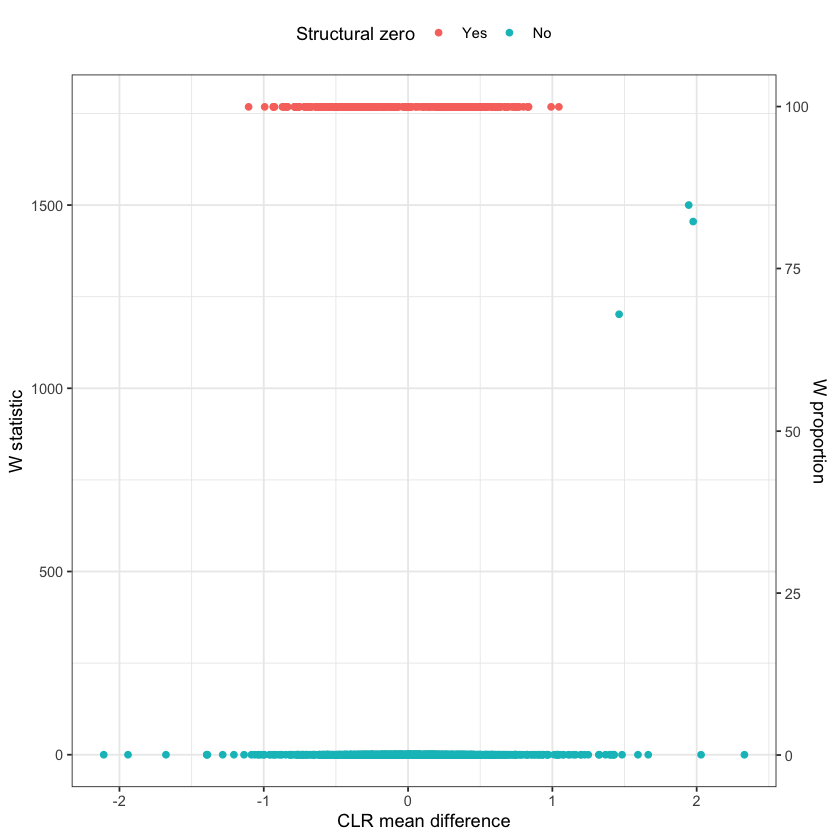

In [32]:
n_taxa <- ifelse(is.null(struc_zero3), nrow(feature_table3), sum(apply(struc_zero3, 1, sum) == 0))
res3$fig + scale_y_continuous(sec.axis = sec_axis(~ . * 100 / (n_taxa-1), name = 'W proportion'))
ggsave(filename = paste(lubridate::today(),'volcano_16S_T5_PvL.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

In [33]:
# save features with W > 0 
non.zero <- res3$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(taxa, by = c('taxa_id' = 'OTU.ID')) %>% 
    mutate(W.proportion = y/(n_taxa-1)) %>% # add W    
    filter(W.proportion > 0) %>% 
    rowid_to_column()
    
write.csv(non.zero, paste(lubridate::today(),'NonZeroW_Features_16S_T5_PvL.csv',sep='_'))

In [34]:
# to find most significant taxa, I will sort the data 
# 1) y (W statistic)
# 2) according to the absolute value of CLR mean difference
sig <- res3$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(taxa, by = c('taxa_id' = 'OTU.ID')) %>% 
    filter(y >= (0.7*n_taxa), !is.na(Lowest.Rank)) # keep significant taxa, remove unidentified taxa

write.csv(sig, paste(lubridate::today(),'SigFeatures_16S_T5_PvL.csv',sep='_'))

Saving 7 x 7 in image



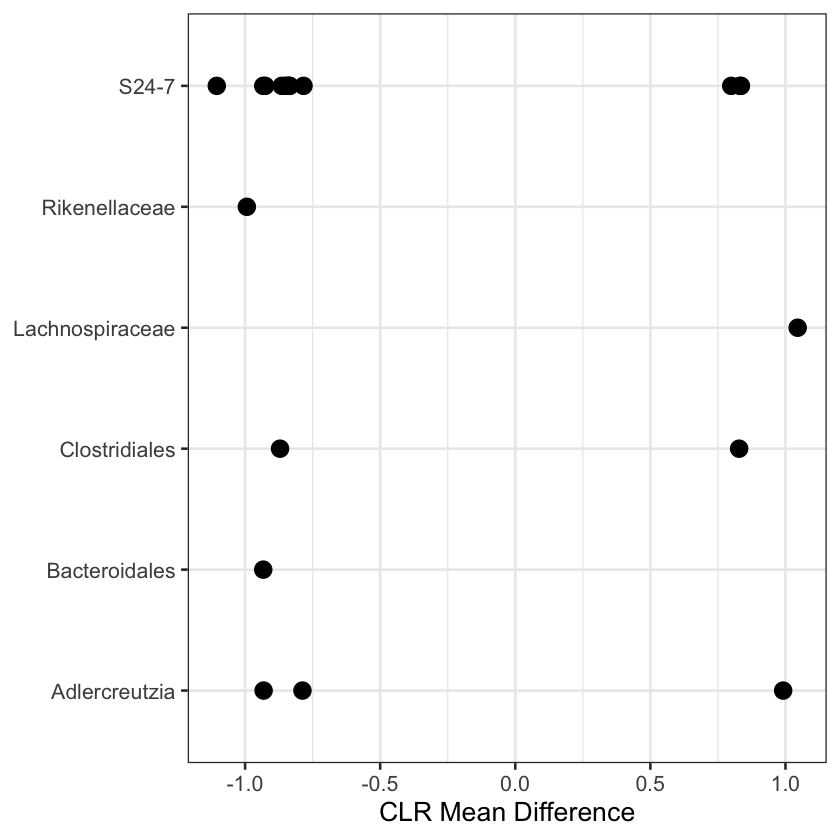

In [35]:
# plot top 20 taxa
sig %>% 
    slice_head(n=20) %>% 
    ggplot(aes(x, Lowest.Rank)) +
    geom_point(aes(size = 1)) +
    theme_bw(base_size = 16) + 
    guides(size = FALSE) +
    labs(x = 'CLR Mean Difference', y = NULL)

ggsave(filename = paste(lubridate::today(),'Top20_16S_T5_PvL.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

### Letrozole v Let-CH

In [36]:
# Data Preprocessing

feature_table <- t5.LvLCH 
sample_var <- "#SampleID"
group_var <- "Category"
out_cut <- 0.05
zero_cut <- 0.90 
lib_cut <- 0
neg_lb <- TRUE

prepro <- feature_table_pre_process(feature_table, meta.t5.LvLCH, sample_var, group_var, 
                                   out_cut, zero_cut, lib_cut, neg_lb)

# Preprocessed feature table
feature_table4 <- prepro$feature_table

# Preprocessed metadata
meta_data4 <- prepro$meta_data 

# Structural zero info
struc_zero4 <- prepro$structure_zeros 

In [37]:
# Run ANCOM

main_var <- "Category"
p_adj_method <- "BH" # number of taxa > 10, therefore use Benjamini-Hochberg correction
alpha <- 0.05
adj_formula <- NULL 
rand_formula <- NULL

t_start <- Sys.time()

res4 <- ANCOM(feature_table4, meta_data4, struc_zero4, main_var, p_adj_method, 
            alpha, adj_formula, rand_formula)

t_end <- Sys.time()
t_end - t_start 

# write output to file
# output contains the "W" statistic for each taxa - a count of the number of times 
# the null hypothesis is rejected for each taxa
# detected_x are logicals indicating detection at specified FDR cut-off
write_csv(res4$out, "2021-07-18_16S_T5_LvLCH_ANCOM_data.csv")

Time difference of 35.56831 mins

Saving 7 x 7 in image



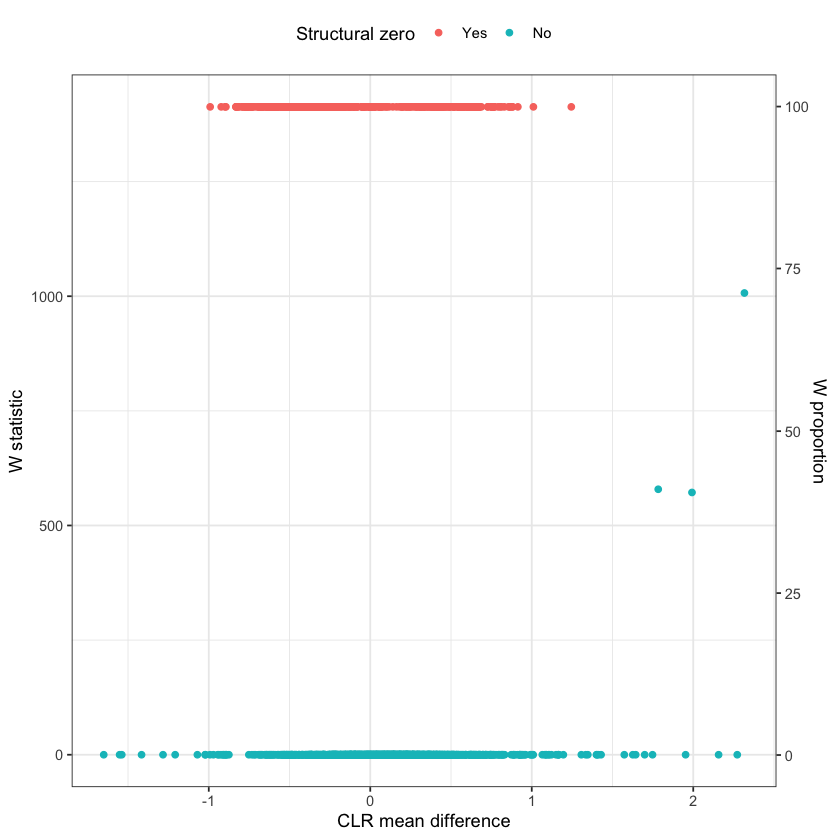

In [38]:
n_taxa <- ifelse(is.null(struc_zero4), nrow(feature_table4), sum(apply(struc_zero4, 1, sum) == 0))
res4$fig + scale_y_continuous(sec.axis = sec_axis(~ . * 100 / (n_taxa-1), name = 'W proportion'))
ggsave(filename = paste(lubridate::today(),'volcano_16S_T5_LvLCH.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

In [39]:
# save features with W > 0 
non.zero <- res4$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(taxa, by = c('taxa_id' = 'OTU.ID')) %>% 
    mutate(W.proportion = y/(n_taxa-1)) %>% # add W    
    filter(W.proportion > 0) %>% 
    rowid_to_column()
    
write.csv(non.zero, paste(lubridate::today(),'NonZeroW_Features_16S_T5_LvLCH.csv',sep='_'))

In [40]:
# to find most significant taxa, I will sort the data 
# 1) y (W statistic)
# 2) according to the absolute value of CLR mean difference
sig <- res4$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(taxa, by = c('taxa_id' = 'OTU.ID')) %>% 
    filter(y >= (0.7*n_taxa), !is.na(Lowest.Rank)) # keep significant taxa, remove unidentified taxa

write.csv(sig, paste(lubridate::today(),'SigFeatures_16S_T5_LvLCH.csv',sep='_'))

Saving 7 x 7 in image



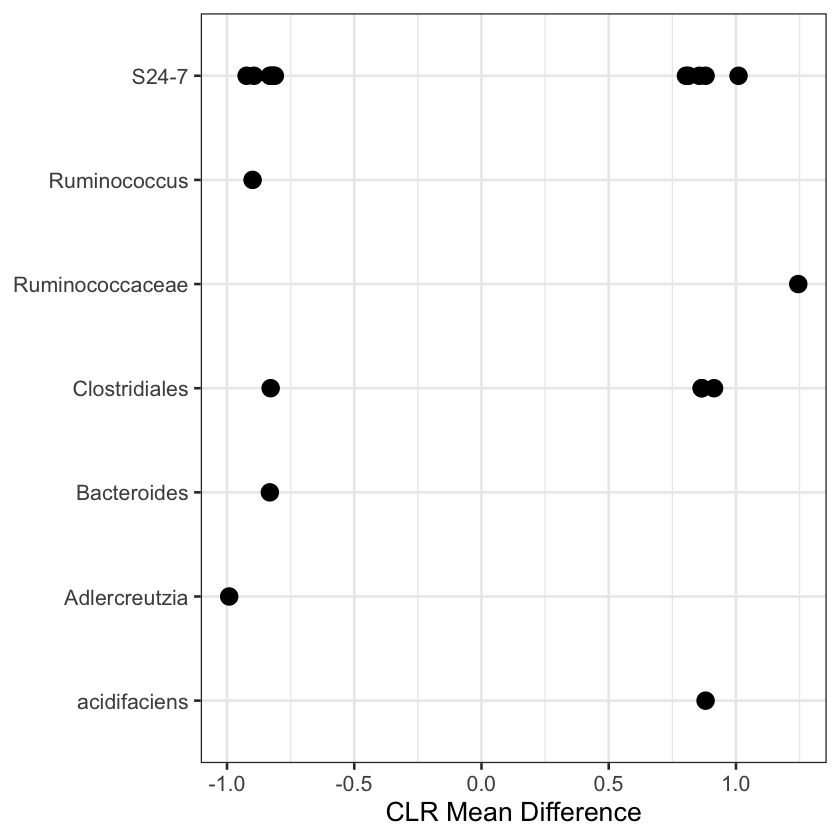

In [41]:
# plot top 20 taxa
sig %>% 
    slice_head(n=20) %>% 
    ggplot(aes(x, Lowest.Rank)) +
    geom_point(aes(size = 1)) +
    theme_bw(base_size = 16) + 
    guides(size = FALSE) +
    labs(x = 'CLR Mean Difference', y = NULL)

ggsave(filename = paste(lubridate::today(),'Top20_16S_T5_LvLCH.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')